In [ ]:
#Dependencies
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands


In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction using Mediapipe
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
#For simple Landmarks
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [4]:
#For more Reformed Landmarks
def draw_styled_landmarks(image, results):
    # Draw face connections
    #mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
     #                        mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
    ##                        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                 #            ) 
    # Draw pose connections
   # mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                            # mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=2), 
                           #  mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                            # ) 
    # Draw left hand connections
   # mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             #mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=2), 
                            # mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                            # ) 
    # Draw right hand connections  
   # mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                            # mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                            # mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                            # ) 

    mp_drawing.draw_landmarks(image,results.left_hand_landmarks,mp_hands.HAND_CONNECTIONS,mp_drawing_styles.get_default_hand_landmarks_style(),mp_drawing_styles.get_default_hand_connections_style())
    mp_drawing.draw_landmarks(image,results.right_hand_landmarks,mp_hands.HAND_CONNECTIONS,mp_drawing_styles.get_default_hand_landmarks_style(),mp_drawing_styles.get_default_hand_connections_style())


In [8]:
draw_landmarks(frame, results)

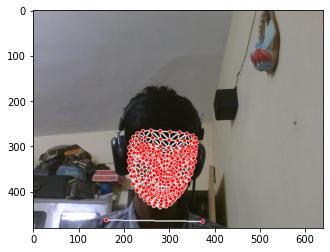

In [9]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [6]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

NameError: name 'results' is not defined

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [5]:
def extract_keypoints(results):
    #pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    #face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([ lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.45403647,  0.74266613, -1.26125944, ...,  0.        ,
        0.        ,  0.        ])

In [ ]:
np.save('0', result_test) #Save Np Data

In [ ]:
np.load('0.npy') #Load Np Data

In [61]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [58]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [59]:
#Press q to access forward
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(20)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(2) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
#cap.release() Only use if the camera is not responding
#cv2.destroyAllWindows()

In [60]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [62]:
label_map = {label:num for num, label in enumerate(actions)}

In [63]:
label_map

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9,
 'K': 10,
 'L': 11,
 'M': 12,
 'N': 13,
 'O': 14,
 'P': 15,
 'Q': 16,
 'R': 17,
 'S': 18,
 'T': 19,
 'U': 20,
 'V': 21,
 'W': 22,
 'X': 23,
 'Y': 24,
 'Z': 25}

In [64]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [65]:
np.array(sequences).shape

(780, 30, 126)

In [66]:
np.array(labels).shape

(780,)

In [67]:
X = np.array(sequences)

In [68]:
X.shape

(780, 30, 126)

In [69]:
y = to_categorical(labels).astype(int)

In [70]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [72]:
y_test.shape

(39, 26)

In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [74]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [75]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,126)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [76]:
res = [.7, 0.2, 0.1]

In [77]:
actions[np.argmax(res)]

'A'

In [78]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [80]:
model.fit(X_train, y_train, epochs=500, callbacks=[tb_callback])

Epoch 1/500
24/24 [==============================] - 3s 126ms/step - loss: 8.9768e-07 - categorical_accuracy: 1.0000
Epoch 2/500
24/24 [==============================] - 2s 88ms/step - loss: 8.8256e-07 - categorical_accuracy: 1.0000
Epoch 3/500
24/24 [==============================] - 2s 83ms/step - loss: 8.7001e-07 - categorical_accuracy: 1.0000
Epoch 4/500
24/24 [==============================] - 2s 82ms/step - loss: 8.5763e-07 - categorical_accuracy: 1.0000
Epoch 5/500
24/24 [==============================] - 2s 83ms/step - loss: 8.4267e-07 - categorical_accuracy: 1.0000
Epoch 6/500
24/24 [==============================] - 2s 86ms/step - loss: 8.3173e-07 - categorical_accuracy: 1.0000
Epoch 7/500
24/24 [==============================] - 2s 87ms/step - loss: 8.1628e-07 - categorical_accuracy: 1.0000
Epoch 8/500
24/24 [==============================] - 2s 82ms/step - loss: 8.0389e-07 - categorical_accuracy: 1.0000
Epoch 9/500
24/24 [==============================] - 2s 89ms/step - los

In [81]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 64)            48896     
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 128)           98816     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                858       
Total params: 204,218
Trainable params: 204,218
Non-trainable params: 0
__________________________________________________

In [82]:
#Making Predication
res = model.predict(X_test)

In [97]:
actions[np.argmax(res[0])]

'A'

In [84]:
actions[np.argmax(y_test[1])]

'Y'

In [85]:
#Saving Weights of Model
model.save('alphabet_acc.h5')



In [ ]:
#del model (To Delete the model if accuracy is not up to specification)

In [86]:
model.load_weights('alphabet_acc.h5') #To Reload the Model

In [87]:
#Evaluation Using Confusion Matrix
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [88]:
yhat = model.predict(X_test)

In [89]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [90]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[38,  1],
        [ 0,  0]],

       [[35,  0],
        [ 0,  4]],

       [[37,  0],
        [ 0,  2]],

       [[38,  0],
        [ 0,  1]],

       [[37,  0],
        [ 0,  2]],

       [[38,  0],
        [ 0,  1]],

       [[38,  1],
        [ 0,  0]],

       [[38,  0],
        [ 0,  1]],

       [[37,  0],
        [ 0,  2]],

       [[38,  0],
        [ 0,  1]],

       [[36,  0],
        [ 0,  3]],

       [[38,  0],
        [ 0,  1]],

       [[38,  1],
        [ 0,  0]],

       [[37,  0],
        [ 1,  1]],

       [[38,  0],
        [ 0,  1]],

       [[36,  0],
        [ 1,  2]],

       [[37,  0],
        [ 0,  2]],

       [[35,  0],
        [ 0,  4]],

       [[38,  0],
        [ 0,  1]],

       [[37,  0],
        [ 1,  1]],

       [[35,  0],
        [ 0,  4]],

       [[37,  0],
        [ 0,  2]]], dtype=int64)

In [91]:
accuracy_score(ytrue, yhat)

0.9230769230769231

In [45]:
#Testing the Model Run this to see the Code
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [46]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [49]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [50]:
len(sequence)

TypeError: object of type 'int' has no len()

In [51]:
sequence.append('def')

AttributeError: 'int' object has no attribute 'append'

In [52]:
sequence.reverse()

AttributeError: 'int' object has no attribute 'reverse'

In [53]:
sequence[-10:]

TypeError: 'int' object is not subscriptable

In [92]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [ ]:
#cap.release() Use if the Camera is stuck
#cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,15,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))

In [5]:
#Camera Feed for Initial Setup Run for Test
#Setting Mediapipe Model
sequence=[]
sentence=[]
threshold =0.4

cap= cv2.VideoCapture(0) #Change for a virtual video feed might need to trial and error
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    while cap.isOpened():
        ret, frame = cap.read()
        
        image,results=mediapipe_detection(frame, holistic)
        print(results) #printing results
        
        
        #Draw landmarks
        draw_styled_landmarks(frame, results)
        
        #Prediction Logic
        #keypoints = extract_keypoints(results) #Uncomment to verify the model
        #sequence.insert(0,keypoints)
        #sequence=sequence[:15]
        
        #if len(sequence)==15:
            #res=model.predict(np.expand_dims(sequence,axis=0))[0]
            #print(actions[np.argmax(res)])
            
        cv2.imshow('OpenCv Cam Feed',frame)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

KeyboardInterrupt: 